In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/mushroom-classification/mushrooms.csv


mushrooms.describe()

In [2]:
mushrooms = pd.read_csv('../input/mushroom-classification/mushrooms.csv')
mushrooms.describe()
#To check the top few rows
mushrooms.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#Check the dimensions and shape
mushrooms.ndim


2

In [4]:
mushrooms.shape

(8124, 23)

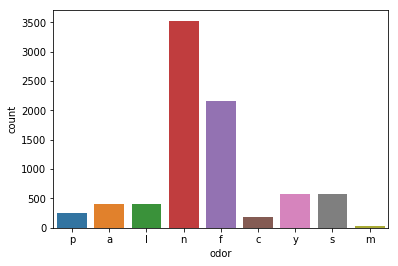

In [5]:
#Plotting different variables to see the distribution
import seaborn as sns
plot1 = sns.countplot(x= 'odor', data = mushrooms)

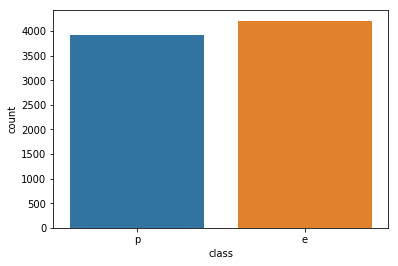

In [6]:
plot2 = sns.countplot(x= 'class', data = mushrooms)

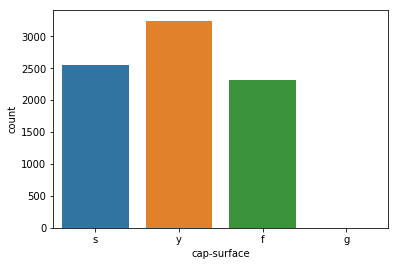

In [7]:
plot3 = sns.countplot(x= 'cap-surface', data = mushrooms)

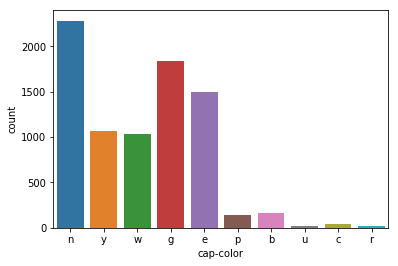

In [8]:
plot3 = sns.countplot(x= 'cap-color', data = mushrooms)

In [9]:
#Variablenames Extraction

variable_labels = np.asarray(mushrooms.columns)[0:]

In [10]:
X_var = variable_labels[1:22]

In [11]:
X_var

array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population'], dtype=object)

In [12]:
#Replace Categoricaldata with dummy variable
#Used Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(mushrooms['cap-shape'].drop_duplicates())
mushrooms['cap-shape']=encoder.transform(mushrooms['cap-shape'])
encoder.fit(mushrooms['cap-surface'].drop_duplicates())
mushrooms['cap-surface']=encoder.transform(mushrooms['cap-surface'])
encoder.fit(mushrooms['cap-color'].drop_duplicates())
mushrooms['cap-color']=encoder.transform(mushrooms['cap-color'])
encoder.fit(mushrooms['bruises'].drop_duplicates())
mushrooms['bruises']=encoder.transform(mushrooms['bruises'])
encoder.fit(mushrooms['odor'].drop_duplicates())
mushrooms['odor']=encoder.transform(mushrooms['odor'])
encoder.fit(mushrooms['gill-attachment'].drop_duplicates())
mushrooms['gill-attachment']=encoder.transform(mushrooms['gill-attachment'])
encoder.fit(mushrooms['gill-spacing'].drop_duplicates())
mushrooms['gill-spacing']=encoder.transform(mushrooms['gill-spacing'])
encoder.fit(mushrooms['gill-size'].drop_duplicates())
mushrooms['gill-size']=encoder.transform(mushrooms['gill-size'])
encoder.fit(mushrooms['gill-color'].drop_duplicates())
mushrooms['gill-color']=encoder.transform(mushrooms['gill-color'])
encoder.fit(mushrooms['stalk-shape'].drop_duplicates())
mushrooms['stalk-shape']=encoder.transform(mushrooms['stalk-shape'])
encoder.fit(mushrooms['stalk-root'].drop_duplicates())
mushrooms['stalk-root']=encoder.transform(mushrooms['stalk-root'])
encoder.fit(mushrooms['stalk-surface-above-ring'].drop_duplicates())
mushrooms['stalk-surface-above-ring']=encoder.transform(mushrooms['stalk-surface-above-ring'])
encoder.fit(mushrooms['stalk-surface-below-ring'].drop_duplicates())
mushrooms['stalk-surface-below-ring']=encoder.transform(mushrooms['stalk-surface-below-ring'])
encoder.fit(mushrooms['stalk-surface-below-ring'].drop_duplicates())
mushrooms['stalk-surface-below-ring']=encoder.transform(mushrooms['stalk-surface-below-ring'])
encoder.fit(mushrooms['stalk-color-above-ring'].drop_duplicates())
mushrooms['stalk-color-above-ring']=encoder.transform(mushrooms['stalk-color-above-ring'])
encoder.fit(mushrooms['stalk-color-below-ring'].drop_duplicates())
mushrooms['stalk-color-below-ring']=encoder.transform(mushrooms['stalk-color-below-ring'])
encoder.fit(mushrooms['veil-type'].drop_duplicates())
mushrooms['veil-type']=encoder.transform(mushrooms['veil-type'])
encoder.fit(mushrooms['veil-color'].drop_duplicates())
mushrooms['veil-color']=encoder.transform(mushrooms['veil-color'])
encoder.fit(mushrooms['ring-number'].drop_duplicates())
mushrooms['ring-number']=encoder.transform(mushrooms['ring-number'])
encoder.fit(mushrooms['ring-type'].drop_duplicates())
mushrooms['ring-type']=encoder.transform(mushrooms['ring-type'])
encoder.fit(mushrooms['spore-print-color'].drop_duplicates())
mushrooms['spore-print-color']=encoder.transform(mushrooms['spore-print-color'])
encoder.fit(mushrooms['population'].drop_duplicates())
mushrooms['population']=encoder.transform(mushrooms['population'])



In [13]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split

#use iloc for selecting the class as y variable as this is about mushroom classification and all others as X variable
X = mushrooms.iloc[:,1:22]
y = mushrooms.iloc[:,0]

In [14]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [15]:
#Method1 - RandomForestClassification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_pred_rf = rf.predict(X_test)
error_rf = metrics.accuracy_score(y_test,y_pred_rf)
print(np.sqrt(error_rf))

1.0


In [17]:
#Feature Importance Plot
importance = rf.feature_importances_

In [18]:
#Visualize Feature Importance
indices = np.argsort(rf.feature_importances_)[::-1]
names = [X_var[i] for i in indices]

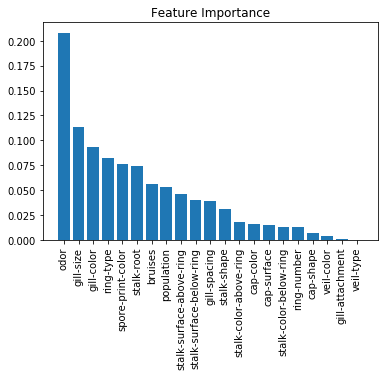

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importance[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()


In [20]:
#Method 2 - K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[849   3]
 [  0 773]]


In [22]:
print(classification_report(y_test, y_pred))
#From the confusion matrix and the classification report it can be seen that the class e 849 have been predicted correctly and
#3 are predicted wrong. Similarly, for class p all 773 are predicted correctly.

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       852
           p       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [23]:
#initiate the error values as a empty matrix. With the loop running from 1 to 20 the error value will get appendend accordingly
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [24]:
error

[0.0012307692307692308,
 0.0012307692307692308,
 0.0024615384615384616,
 0.0024615384615384616,
 0.0018461538461538461,
 0.0018461538461538461,
 0.0024615384615384616,
 0.003076923076923077,
 0.003076923076923077,
 0.0024615384615384616,
 0.003076923076923077,
 0.0043076923076923075,
 0.004923076923076923,
 0.0043076923076923075,
 0.0043076923076923075,
 0.0043076923076923075,
 0.0043076923076923075,
 0.004923076923076923,
 0.004923076923076923]

In [25]:
#From the above we can see mean error is lowest when k=1,2 and k=5,6 . Since k=1 will not classify it we can go for the next best 
#option that produces lowest error which is k=2 which is ideal in this case as 'Class' has 2 levels e and p

#Accuracy
y_pred_knn = classifier.predict(X_test)
error_knn = metrics.accuracy_score(y_test,y_pred_knn)
print(np.sqrt(error_knn))

0.9990764966477023


In [26]:
#From the above 2 methods of knn and random forest we can see that random forest has slightly better accuracy than knn
